In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import HashingEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from category_encoders import HashingEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
df=pd.read_csv('SPL_fe.csv', low_memory=False, index_col='Unnamed: 0')

In [25]:
dfPred=pd.read_csv('pred.csv', low_memory=False, index_col='Unnamed: 0')

In [26]:
dfPred

,checkoutyear,checkoutmonth,publisher,pages,rating,count_ratings,count_reviews,perc_5stars,perc_4stars,perc_3stars,perc_2stars,perc_1stars,count_books_author,count_followers_author,awards,publicationyear,genres,creator
0,2023,5,"Vrijdag,",271,4.03,3851,450,37,37,18,5,1,1,228,0,2017,"['Fiction','Roman','Romance','Young Adult','Sc...",Zita Theunynck


In [69]:
len(df)

2158064

In [70]:
df.head()

,checkoutyear,checkoutmonth,checkouts,title,publisher,pages,rating,count_ratings,count_reviews,perc_5stars,perc_4stars,perc_3stars,perc_2stars,perc_1stars,count_books_author,count_followers_author,awards,publicationyear,genres,creator
0,2020,2,1,What's it really like to be a carpenter? / Chr...,"PowerKids Press,",24.0,3.915075,0,0,0,0,0,0,0,84.0,1.0,0,2020.0,['Carpentry Vocational guidance Juvenile liter...,Christine Honders
1,2020,2,2,Nana in the city / by Lauren Castillo.,"Clarion Books, Houghton Mifflin Harcourt,",40.0,4.090000,2710,581,34,43,19,2,1,28.0,141.0,1,2014.0,"['Picture Books', 'Family', 'Childrens', 'Fict...",Lauren Castillo
2,2020,2,2,Blindness / José Saramago ; translated from th...,"Harcourt Brace & Company,",293.0,4.160000,263610,21675,44,35,14,4,1,313.0,14100.0,2,1998.0,"['Fiction', 'Dystopia', 'Science Fiction', 'Cl...",José Saramago
3,2020,2,4,The liar's girl / Catherine Ryan Howard.,"Blackstone Publishing,",330.0,3.920000,17642,1642,24,48,23,3,1,22.0,2689.0,1,2018.0,"['Mystery', 'Thriller', 'Fiction', 'Audiobook'...",Catherine Ryan Howard
4,2020,2,1,The aloha quilt / Jennifer Chiaverini.,"Thorndike Press,",324.0,3.890000,4946,653,29,37,27,5,1,56.0,3890.0,0,2010.0,"['Fiction', 'Quilting', 'Chick Lit', 'Historic...",Jennifer Chiaverini


outlier detection

In [71]:
df['checkouts'].describe()

count    2.158064e+06
mean     2.869657e+00
std      7.499823e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.390000e+02
Name: checkouts, dtype: float64

<AxesSubplot:xlabel='checkouts'>

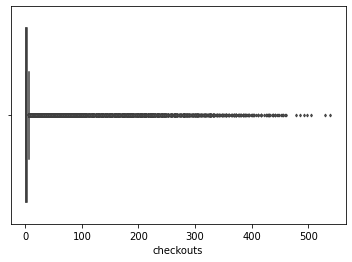

In [72]:
sns.boxplot(x=df['checkouts'], flierprops = dict(markerfacecolor = '0.50', markersize = 2))

In [27]:
Q1 = np.percentile(df['checkouts'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['checkouts'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

print(lower, upper)
df=df[df['checkouts']<upper]

-2.0 6.0


In [74]:
len(df)

1928779

X en y def

In [28]:
X=df.drop(['checkouts', 'title'], axis=1)
y=df.checkouts
# dfS

<AxesSubplot:xlabel='checkouts'>

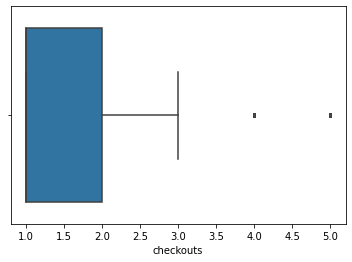

In [42]:
sns.boxplot(x=y, flierprops = dict(markerfacecolor = '0.50', markersize = 2))

In [75]:
y.describe()

count    2.158064e+06
mean     2.869657e+00
std      7.499823e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.390000e+02
Name: checkouts, dtype: float64

Train en test set

In [29]:
size_df=len(df)
t=int(np.round(size_df*0.8))
X_train=X[:t]
y_train=y[:t]
X_test=X[t:]
y_test=y[t:]

In [44]:
X_test.tail()

,checkoutyear,checkoutmonth,publisher,pages,rating,count_ratings,count_reviews,perc_5stars,perc_4stars,perc_3stars,perc_2stars,perc_1stars,count_books_author,count_followers_author,awards,publicationyear,genres,creator
2158059,2023,2,"Minotaur Books,",240.0,3.70,10554,1026,19,39,33,5,1,88.0,814.0,0,2015.0,"['Mystery', 'Historical Fiction', 'Fiction', '...",Carola Dunn
2158060,2023,2,"Creative Homeowner,",320.0,4.00,12,3,33,41,16,8,0,45.0,2.0,0,2011.0,['Nonfiction'],Roger Holmes
2158061,2023,2,"Houghton Mifflin co.,",44.0,4.29,40831,1388,55,25,14,3,1,41.0,193.0,1,1942.0,"['Picture Books', 'Childrens', 'Fiction', 'Cla...",Virginia Lee Burton
2158062,2023,2,"Dial Books,",384.0,3.70,3611,908,19,41,30,7,1,9.0,1457.0,0,2022.0,"['LGBT', 'Romance', 'Young Adult', 'Contempora...",Adib Khorram
2158063,2023,2,"Jonathan Cape,",160.0,3.33,6,0,0,33,66,0,0,10.0,1.0,0,2001.0,"['Mayne Roger', ' Photography Artistic']",Roger Mayne


In [45]:
print(X_train.shape, X_test.shape)

(1543023, 18) (385756, 18)


Scalen en ecoding

In [30]:
num_X_train=X_train.drop(['publisher', 'genres', 'creator'], axis=1)
num_X_test=X_test.drop(['publisher', 'genres', 'creator'], axis=1)
num_X_pred=dfPred.drop(['publisher', 'genres', 'creator'], axis=1)
cat_X_train = X_train[['publisher', 'genres', 'creator']]
cat_X_test = X_test[['publisher', 'genres', 'creator']]
cat_X_pred = dfPred[['publisher', 'genres', 'creator']]

scaler = StandardScaler()
scaler.fit(num_X_train)
X_train_scaled = pd.DataFrame(scaler.transform(num_X_train), columns=num_X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(num_X_test), columns=num_X_test.columns)
X_pred_scaled = pd.DataFrame(scaler.transform(num_X_pred), columns=num_X_pred.columns)

In [31]:
cat_X_train=cat_X_train.reset_index().drop(['index'], axis=1)
cat_X_test=cat_X_test.reset_index().drop(['index'], axis=1)
cat_X_pred=cat_X_pred.reset_index().drop(['index'], axis=1)

X_train_scaled=X_train_scaled.merge(cat_X_train, left_index=True, right_index=True)
X_test_scaled=X_test_scaled.merge(cat_X_test, left_index=True, right_index=True)
X_pred_scaled=X_pred_scaled.merge(cat_X_pred, left_index=True, right_index=True)

2 soorten encoders

In [32]:
from category_encoders import LeaveOneOutEncoder, TargetEncoder, HashingEncoder
y_train=y_train.reset_index().drop(['index'], axis=1)
y_test=y_test.reset_index().drop(['index'], axis=1)

# enc = TargetEncoder(cols=['publisher', 'genres', 'creator'])
enc = LeaveOneOutEncoder(cols=['publisher', 'genres', 'creator'])
X_train_scaled = enc.fit_transform(X_train_scaled, y_train)
X_test_scaled = enc.transform(X_test_scaled, y_test)
X_pred_scaled = enc.transform(X_pred_scaled)

Modellen opstellen

In [49]:
models = [LinearRegression(),
          # Lasso(random_state=42),
        #   KNeighborsRegressor(),
          Ridge(alpha=1, solver="auto", random_state=42),
        #   SGDRegressor(random_state=42),
          DecisionTreeRegressor(random_state=42),
          # RandomForestRegressor(random_state = 42),
          GradientBoostingRegressor(random_state = 42),
          XGBRegressor()]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train_scaled, y_train)
    
    # Make predictions with model
    y_pred = reg_model.predict(X_test_scaled)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_pred)
    print('{} done.'.format(name))
    print('     R²={}'.format(r2_score(y_test, y_pred)))
    print('     RMSE={}'.format(mean_squared_error(y_test, y_pred, squared=False)))
    print('     MAPE={}'.format(mean_absolute_percentage_error(y_test, y_pred)))
    print('     MAE={}'.format(mean_absolute_error(y_test, y_pred)))

LinearRegression done.
     R²=0.09632468706238284
     RMSE=1.0462922468255735
     MAPE=0.5016931982085631
     MAE=0.7699304909499832
Ridge done.
     R²=0.09632503434149842
     RMSE=1.0462920457824136
     MAPE=0.5016931801495336
     MAE=0.769930447011417
DecisionTreeRegressor done.
     R²=0.395370154558642
     RMSE=0.8558380449551347
     MAPE=0.20464736776615272
     MAE=0.35017688210509584


c:\Users\jenni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor done.
     R²=0.21380720598576886
     RMSE=0.9759135040290828
     MAPE=0.4849052164555111
     MAE=0.7282080148509229
XGBRegressor done.
     R²=0.47276289190087895
     RMSE=0.7991895245358743
     MAPE=0.37811957993890083
     MAE=0.5665584350606953


In [15]:
print(results)

{'LinearRegression': 0.3893886576233838, 'Ridge': 0.38938862497401505, 'GradientBoostingRegressor': 0.6529072432438681, 'XGBRegressor': 0.6579041985074638}


testen

In [33]:
best=XGBRegressor()
best.fit(X_train_scaled, y_train)
y_pred = best.predict(X_test_scaled)
y_pred_train = best.predict(X_train_scaled)
y_pred_pred = best.predict(X_pred_scaled)

In [34]:
y_pred_pred

array([1.3433365], dtype=float32)

In [21]:
print(np.round((y_pred[50:60])))
print(y_test.iloc[50:60])

[1. 2. 2. 1. 1. 2. 3. 1. 3. 2.]
    checkouts
50          1
51          2
52          3
53          1
54          1
55          1
56          4
57          1
58          5
59          3


In [11]:
print('     RMSE train={}'.format(mean_squared_error(y_train, y_pred_train, squared=False)))
print('     RMSE test={}'.format(mean_squared_error(y_test, y_pred, squared=False)))

     RMSE train=0.9303026927249671
     RMSE test=0.9689077351295626


In [17]:
print('     RMSE train={}'.format(mean_squared_error(y_train, y_pred_train, squared=False)))
print('     RMSE test={}'.format(mean_squared_error(y_test, y_pred, squared=False)))

     RMSE train=0.7254306492240182
     RMSE test=0.7991895245358743


In [19]:
# y_pred=np.round(y_pred)
print('     R²={}'.format(r2_score(y_test, y_pred)))
print('     RMSE={}'.format(mean_squared_error(y_test, y_pred, squared=False)))
print('     MAE={}'.format(mean_absolute_error(y_test, y_pred)))

     R²=0.6529072432438681
     RMSE=4.54476644281218
     MAE=1.3730842863498243


In [35]:
feature_imp = pd.DataFrame(best.feature_importances_,
                                   index = X_train_scaled.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
genres,0.364178
publisher,0.125945
checkoutyear,0.106372
checkoutmonth,0.098607
creator,0.062906
publicationyear,0.060833
count_reviews,0.033958
count_books_author,0.023728
count_ratings,0.022560
count_followers_author,0.020771
